In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


In [2]:
df = pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')

## Check missing values

In [3]:
df.info() # 'HDI for year' has a lot of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [6]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [7]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [8]:
df['country-year'].unique()

array(['Albania1987', 'Albania1988', 'Albania1989', ..., 'Uzbekistan2012',
       'Uzbekistan2013', 'Uzbekistan2014'], dtype=object)

In [9]:
df.groupby('age').head(1) # 6 age groups

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [10]:
df.groupby('age').describe()

year                                                         \
              count         mean       std     min     25%     50%     75%   
age                                                                          
15-24 years  4642.0  2001.275312  8.479669  1985.0  1995.0  2002.0  2008.0   
25-34 years  4642.0  2001.275312  8.479669  1985.0  1995.0  2002.0  2008.0   
35-54 years  4642.0  2001.275312  8.479669  1985.0  1995.0  2002.0  2008.0   
5-14 years   4610.0  2001.173102  8.419515  1985.0  1994.0  2002.0  2008.0   
55-74 years  4642.0  2001.275312  8.479669  1985.0  1995.0  2002.0  2008.0   
75+ years    4642.0  2001.275312  8.479669  1985.0  1995.0  2002.0  2008.0   

                    suicides_no              ... HDI for year         \
                max       count        mean  ...          75%    max   
age                                          ...                       
15-24 years  2016.0      4642.0  174.179664  ...        0.855  0.944   
25-34 years  2016.0      4642.0  242.118053  ...        0.855  0.944   
35-54 years  2016.0      4642.0  528.250969  ...        0.855  0.944   
5-14 years   2015.0      4610.0   11.337093  ...        0.855  0.944   
55-74 years  2016.0      4642.0  357.269065  ...        0.855  0.944   
75+ years    2016.0      4642.0  140.697544  ...        0.855  0.944   

            gdp_per_capita ($)                                            \
                         count         mean           std    min     25%   
age                                                                        
15-24 years             4642.0  16876.57346  18894.414357  251.0  3450.0   
25-34 years             4642.0  16876.57346  18894.414357  251.0  3450.0   
35-54 years             4642.0  16876.57346  18894.414357  251.0  3450.0   
5-14 years              4610.0  16815.56833  18863.290560  251.0  3436.0   
55-74 years             4642.0  16876.57346  18894.414357  251.0  3450.0   
75+ years               4642.0  16876.57346  18894.414357  251.0  3450.0   

                                        
                50%      75%       max  
age                                     
15-24 years  9378.0  24874.0  126352.0  
25-34 years  9378.0  24874.0  126352.0  
35-54 years  9378.0  24874.0  126352.0  
5-14 years   9283.0  24796.0  126352.0  
55-74 years  9378.0  24874.0  126352.0  
75+ years    9378.0  24874.0  126352.0  

[6 rows x 48 columns]

In [11]:
df.groupby(['age', 'sex']).head(1) # 12 sex, age groups

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [12]:
df['age'].value_counts() # uniformly distributed

age
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: count, dtype: int64

In [13]:
df['suicides/100k pop'].value_counts()

suicides/100k pop
0.00     4281
0.29       72
0.32       69
0.34       55
0.37       52
         ... 
46.73       1
41.47       1
61.03       1
28.25       1
26.61       1
Name: count, Length: 5298, dtype: int64

## Visualization

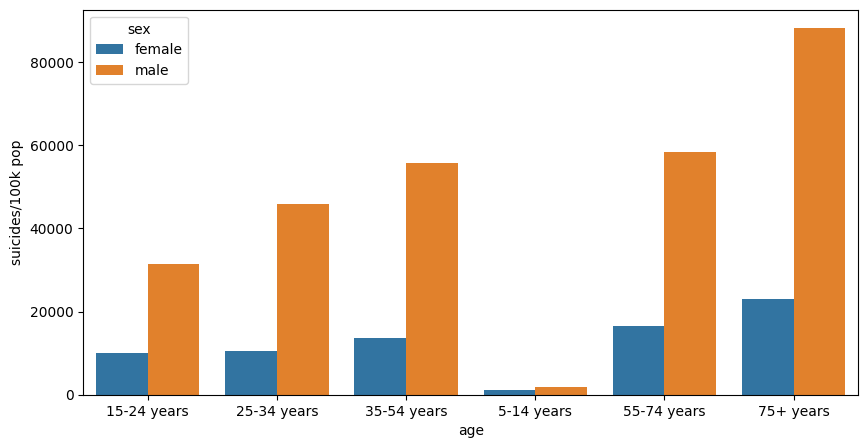

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='age', y='suicides/100k pop', hue='sex', data = df.groupby(['age', 'sex']).sum().reset_index())
plt.show()

In [15]:
df1 = df.groupby(['age', 'sex']).sum() # groupby -> hierarchical index
df1.index

MultiIndex([('15-24 years', 'female'),
            ('15-24 years',   'male'),
            ('25-34 years', 'female'),
            ('25-34 years',   'male'),
            ('35-54 years', 'female'),
            ('35-54 years',   'male'),
            ( '5-14 years', 'female'),
            ( '5-14 years',   'male'),
            ('55-74 years', 'female'),
            ('55-74 years',   'male'),
            (  '75+ years', 'female'),
            (  '75+ years',   'male')],
           names=['age', 'sex'])

In [16]:
df.groupby(['age', 'sex']).sum().reset_index() # reset_index(): groupby 연산 후에 발생하는 계층적 인덱스를 정리할 때 활용

,age,sex,country,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,15-24 years,female,AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...,4644960,175437,4245159089,10045.33,Albania1987Albania1988Albania1989Albania1992Al...,541.291,"2,156,624,9002,126,000,0002,335,124,988709,452...",39170527,Generation XGeneration XGeneration XGeneration...
1,15-24 years,male,AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...,4644960,633105,4397787807,31487.36,Albania1987Albania1988Albania1989Albania1992Al...,541.291,"2,156,624,9002,126,000,0002,335,124,988709,452...",39170527,Generation XGeneration XGeneration XGeneration...
2,25-34 years,female,AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...,4644960,208823,4190523226,10614.42,Albania1987Albania1988Albania1989Albania1992Al...,541.291,"2,156,624,9002,126,000,0002,335,124,988709,452...",39170527,BoomersBoomersBoomersBoomersBoomersBoomersGene...
3,25-34 years,male,AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...,4644960,915089,4247580361,45957.10,Albania1987Albania1988Albania1989Albania1992Al...,541.291,"2,156,624,9002,126,000,0002,335,124,988709,452...",39170527,BoomersBoomersBoomersBoomersBoomersBoomersGene...
4,35-54 years,female,AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...,4644960,506233,7266872023,13732.15,Albania1987Albania1988Albania1989Albania1992Al...,541.291,"2,156,624,9002,126,000,0002,335,124,988709,452...",39170527,SilentSilentSilentBoomersBoomersBoomersBoomers...
5,35-54 years,male,AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...,4644960,1945908,7109016100,55653.87,Albania1987Albania1988Albania1989Albania1992Al...,541.291,"2,156,624,9002,126,000,0002,335,124,988709,452...",39170527,SilentSilentSilentBoomersBoomersBoomersBoomers...
6,5-14 years,female,AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...,4612704,16997,4107939076,1065.49,Albania1987Albania1988Albania1989Albania1992Al...,541.291,"2,156,624,9002,126,000,0002,335,124,988709,452...",38759885,Generation XGeneration XGeneration XMillenials...
7,5-14 years,male,AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...,4612704,35267,4290754161,1792.90,Albania1987Albania1988Albania1989Albania1992Al...,541.291,"2,156,624,9002,126,000,0002,335,124,988709,452...",38759885,Generation XGeneration XGeneration XMillenials...
8,55-74 years,female,AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...,4644960,430036,4756740046,16533.52,Albania1987Albania1988Albania1989Albania1992Al...,541.291,"2,156,624,9002,126,000,0002,335,124,988709,452...",39170527,G.I. GenerationG.I. GenerationG.I. GenerationS...
9,55-74 years,male,AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...,4644960,1228407,4046505294,58460.68,Albania1987Albania1988Albania1989Albania1992Al...,541.291,"2,156,624,9002,126,000,0002,335,124,988709,452...",39170527,G.I. GenerationG.I. GenerationG.I. GenerationS...


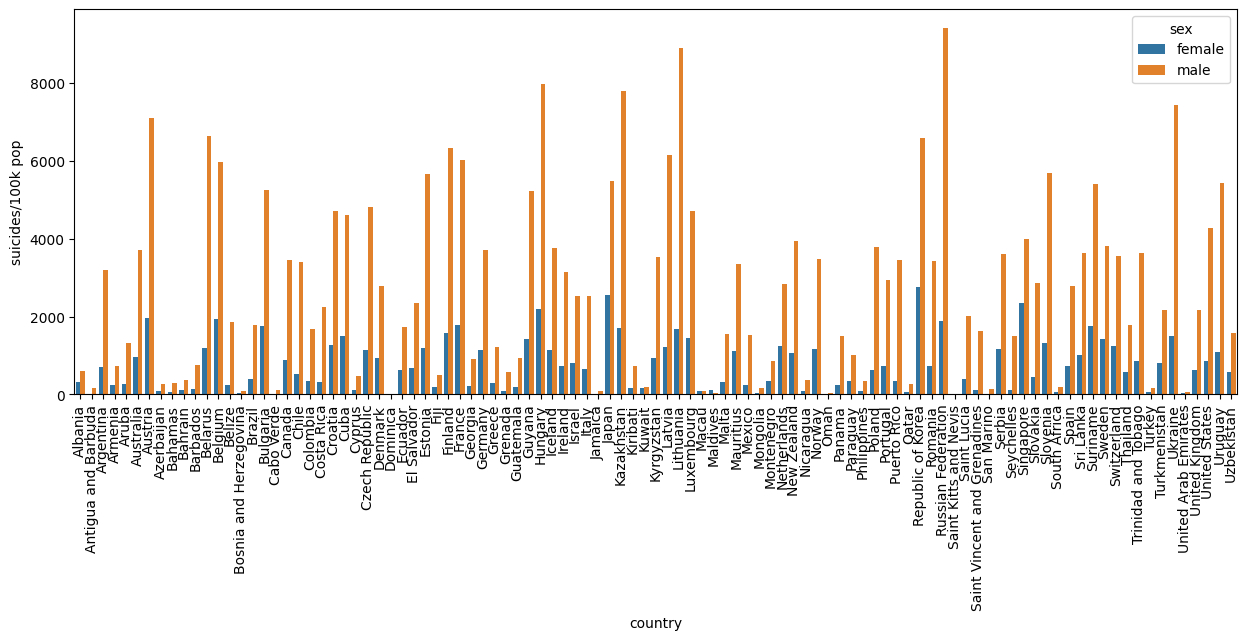

In [17]:
# suicide rate per country&sex
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
sns.barplot(x='country', y='suicides/100k pop', hue='sex', data = df.groupby(['country', 'sex']).sum().reset_index())
plt.xticks(rotation=90)
plt.show()

In [18]:
country_suicides = df.groupby('country').sum().reset_index()
country_suicides.head() # sorted by country

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,527796,malemalefemalemalemalefemalefemalefemalemalefe...,15-24 years35-54 years15-24 years75+ years25-3...,1970,62325467,924.76,Albania1987Albania1987Albania1987Albania1987Al...,32.304,"2,156,624,9002,156,624,9002,156,624,9002,156,6...",490788,Generation XSilentGeneration XG.I. GenerationB...
1,Antigua and Barbuda,647832,femalefemalefemalefemalefemalefemalemalemalema...,15-24 years25-34 years35-54 years5-14 years55-...,11,1990228,179.14,Antigua and Barbuda1985Antigua and Barbuda1985...,28.140,"240,923,926240,923,926240,923,926240,923,92624...",3385212,Generation XBoomersSilentGeneration XG.I. Gene...
2,Argentina,744000,malemalemalefemalemalefemalemalefemalefemalefe...,75+ years55-74 years35-54 years55-74 years25-3...,82219,1035985431,3894.59,Argentina1985Argentina1985Argentina1985Argenti...,93.552,"88,416,668,90088,416,668,90088,416,668,90088,4...",2944044,G.I. GenerationG.I. GenerationSilentG.I. Gener...
3,Armenia,596832,malemalemalemalefemalemalefemalefemalefemalefe...,35-54 years75+ years55-74 years25-34 years35-5...,1905,77348173,976.21,Armenia1990Armenia1990Armenia1990Armenia1990Ar...,66.252,"2,256,838,8582,256,838,8582,256,838,8582,256,8...",558428,SilentG.I. GenerationG.I. GenerationBoomersSil...
4,Aruba,336720,malemalemalemalefemalefemalefemalefemalefemale...,75+ years25-34 years55-74 years35-54 years15-2...,101,1259677,1596.52,Aruba1995Aruba1995Aruba1995Aruba1995Aruba1995A...,0.000,"1,320,670,3911,320,670,3911,320,670,3911,320,6...",4069236,G.I. GenerationGeneration XSilentBoomersGenera...


In [19]:
country_suicides.sort_values(by = 'suicides/100k pop', ascending=False)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
75,Russian Federation,648648,malemalemalemalefemalemalefemalefemalefemalefe...,75+ years35-54 years55-74 years25-34 years75+ ...,1209742,3690802620,11305.13,Russian Federation1989Russian Federation1989Ru...,0.000,"506,500,173,960506,500,173,960506,500,173,9605...",2112096,G.I. GenerationSilentG.I. GenerationBoomersG.I...
52,Lithuania,525420,malemalemalemalemalefemalefemalefemalefemalefe...,35-54 years75+ years55-74 years25-34 years15-2...,28039,68085210,10588.88,Lithuania1995Lithuania1995Lithuania1995Lithuan...,77.136,"7,870,782,2617,870,782,2617,870,782,2617,870,7...",2431504,BoomersG.I. GenerationSilentGeneration XGenera...
40,Hungary,621060,malemalemalefemalemalefemalefemalemalefemalefe...,75+ years35-54 years55-74 years75+ years25-34 ...,73891,248644256,10156.07,Hungary1991Hungary1991Hungary1991Hungary1991Hu...,77.172,"34,748,508,33234,748,508,33234,748,508,33234,7...",2904716,G.I. GenerationBoomersSilentG.I. GenerationBoo...
47,Kazakhstan,624780,malemalemalemalefemalemalefemalefemalefemalefe...,75+ years35-54 years55-74 years25-34 years75+ ...,101546,377513869,9519.52,Kazakhstan1990Kazakhstan1990Kazakhstan1990Kaza...,80.016,"26,932,728,89926,932,728,89926,932,728,89926,9...",1662684,G.I. GenerationSilentG.I. GenerationBoomersG.I...
73,Republic of Korea,744000,malemalemalemalemalefemalefemalefemalefemalefe...,75+ years55-74 years35-54 years25-34 years15-2...,261730,1354944936,9350.45,Republic of Korea1985Republic of Korea1985Repu...,0.000,"100,273,097,170100,273,097,170100,273,097,1701...",5506068,G.I. GenerationG.I. GenerationSilentBoomersGen...
...,...,...,...,...,...,...,...,...,...,...,...,...
45,Jamaica,407604,malefemalemalemalemalefemalefemalefemalefemale...,75+ years75+ years15-24 years25-34 years35-54 ...,184,39481817,106.44,Jamaica1985Jamaica1985Jamaica1985Jamaica1985Ja...,50.448,"2,100,223,1502,100,223,1502,100,223,1502,100,2...",673452,G.I. GenerationG.I. GenerationGeneration XBoom...
96,United Arab Emirates,144540,malemalefemalemalefemalemalefemalefemalefemale...,35-54 years55-74 years15-24 years25-34 years25...,622,36502275,94.89,United Arab Emirates2005United Arab Emirates20...,19.800,"180,617,018,380180,617,018,380180,617,018,3801...",3035664,BoomersSilentMillenialsGeneration XGeneration ...
65,Oman,72396,malemalemalemalefemalefemalefemalefemalefemale...,75+ years25-34 years15-24 years35-54 years15-2...,33,8987087,26.50,Oman2009Oman2009Oman2009Oman2009Oman2009Oman20...,19.056,"48,388,296,48948,388,296,48948,388,296,48948,3...",746664,SilentGeneration XMillenialsBoomersMillenialsG...
76,Saint Kitts and Nevis,71676,femalefemalefemalefemalefemalefemalemalemalema...,15-24 years25-34 years35-54 years5-14 years55-...,0,117300,0.00,Saint Kitts and Nevis1990Saint Kitts and Nevis...,0.000,"208,740,444208,740,444208,740,444208,740,44420...",198900,Generation XBoomersSilentGeneration XG.I. Gene...


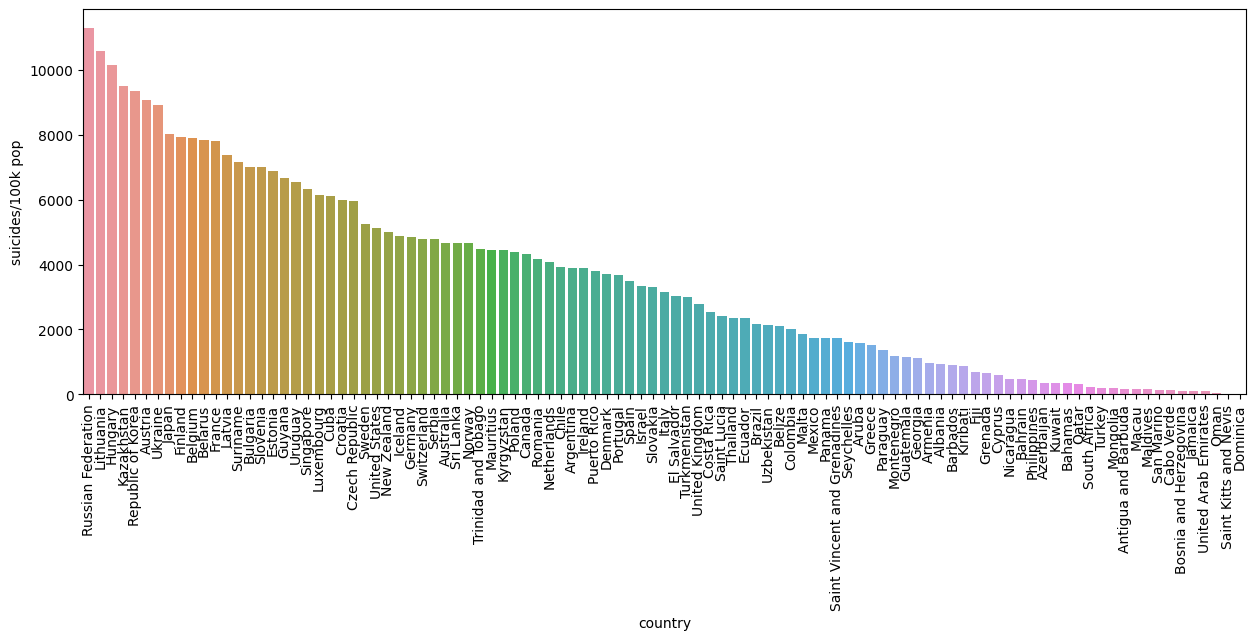

In [20]:
# suicide rate per country&sex
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
sns.barplot(x='country', y='suicides/100k pop', data = country_suicides.sort_values(by = 'suicides/100k pop', ascending=False))
plt.xticks(rotation=90)
plt.show()

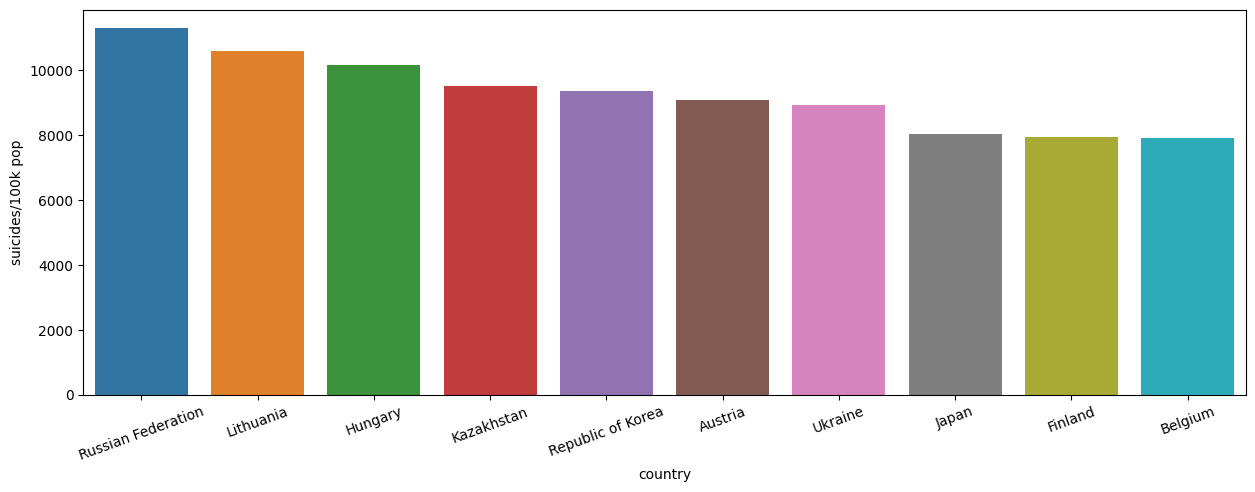

In [21]:
# Top 10
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.barplot(x='country', y='suicides/100k pop', data = country_suicides.sort_values(by = 'suicides/100k pop', ascending=False)[:10])
plt.xticks(rotation=20)
plt.show()

/tmp/ipykernel_18/106628147.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='Density'>

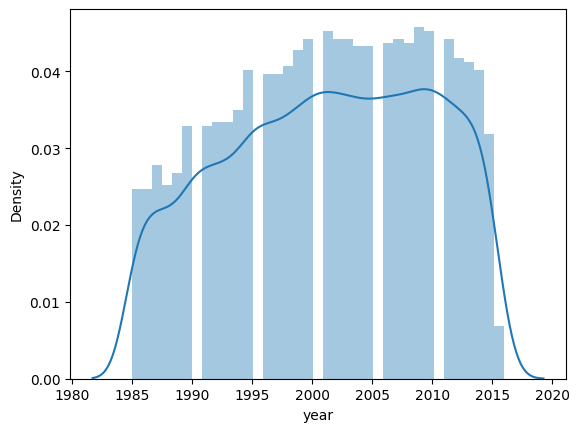

In [22]:
# yearly data
sns.distplot(df['year'])

In [23]:
df['year'].value_counts()

year
2009    1068
2010    1056
2001    1056
2002    1032
2000    1032
2011    1032
2007    1032
2003    1032
2008    1020
2006    1020
2004    1008
2005    1008
1999     996
2012     972
2013     960
1998     948
1995     936
2014     936
1997     924
1996     924
1994     816
1993     780
1992     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='count'>

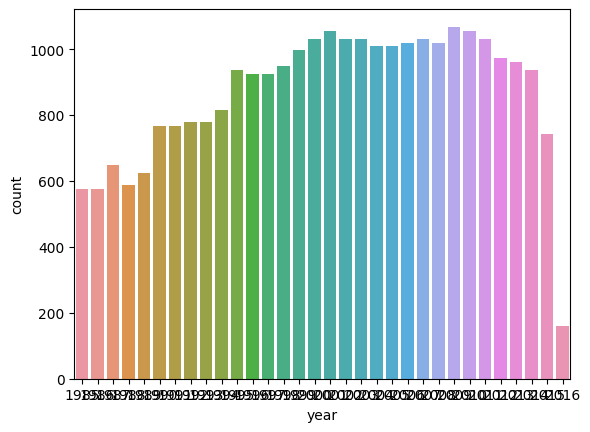

In [24]:
sns.countplot(x = 'year',data = df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='year', ylabel='suicides/100k pop'>

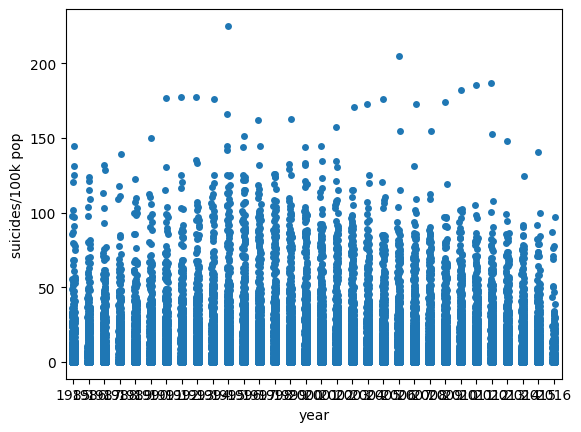

In [25]:
sns.stripplot(x='year', y='suicides/100k pop', data=df)

In [26]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [27]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [28]:
df['generation'].value_counts()

generation
Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: count, dtype: int64

<Axes: xlabel='generation', ylabel='count'>

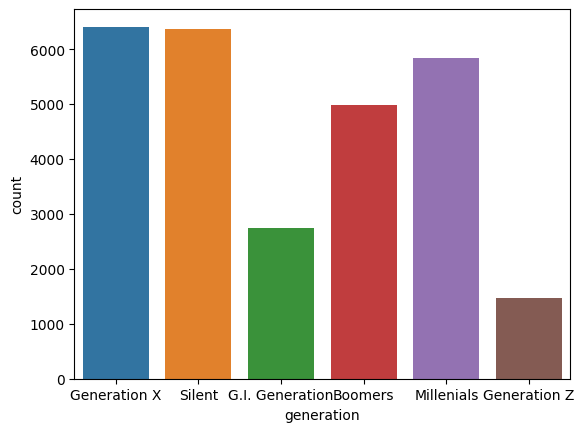

In [29]:
sns.countplot(x='generation', data=df)

<Axes: ylabel='count'>

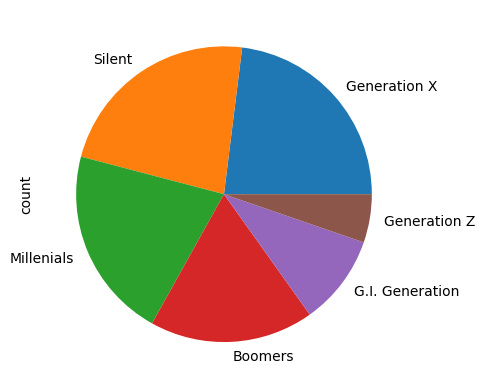

In [30]:
df['generation'].value_counts().plot.pie() # pie chart

<Axes: >

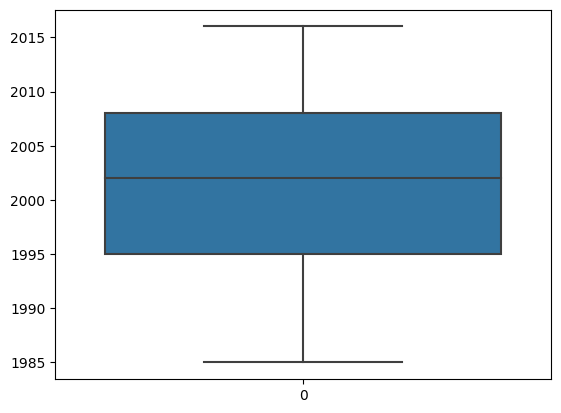

In [31]:
sns.boxplot(df['year'])

<Axes: >

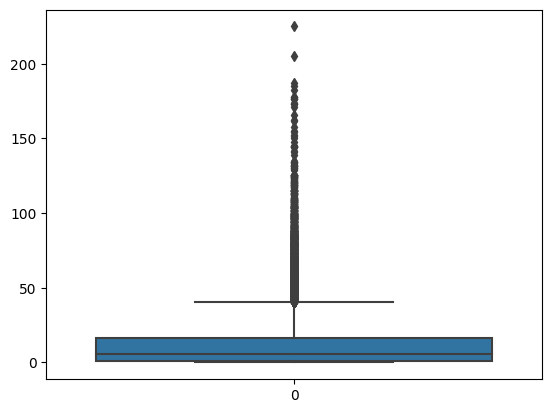

In [32]:
sns.boxplot(df['suicides/100k pop'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


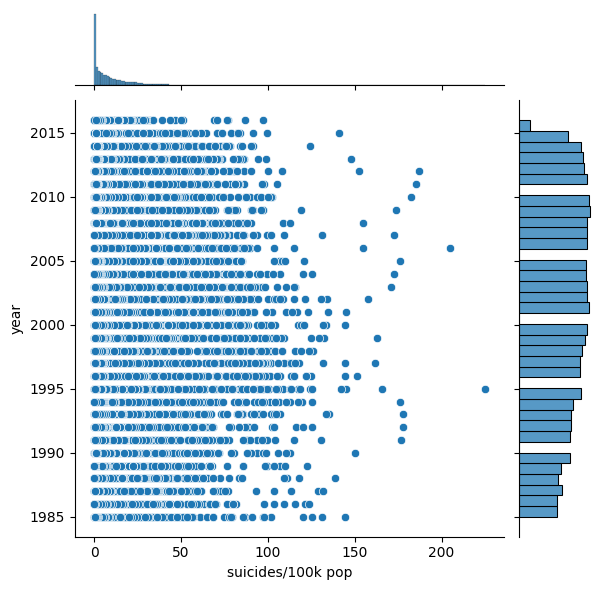

In [33]:
sns.jointplot(x='suicides/100k pop', y='year', data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


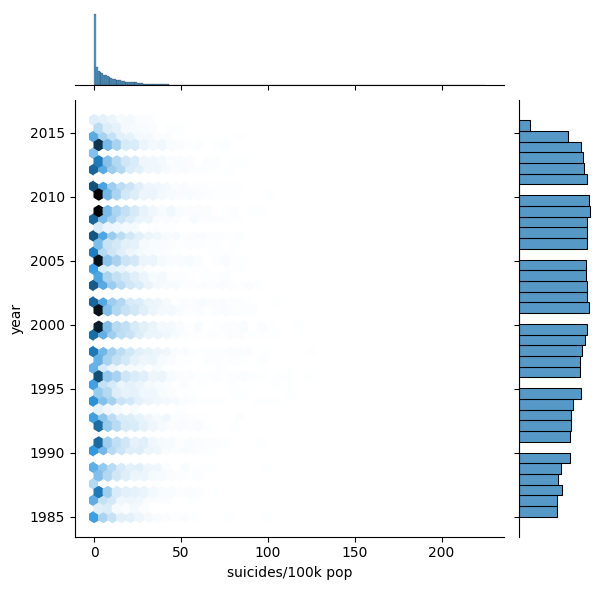

In [34]:
sns.jointplot(x='suicides/100k pop', y='year', data=df, kind='hex')

<Axes: >

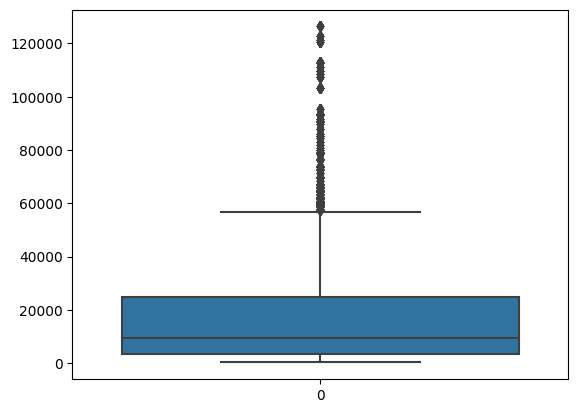

In [35]:
sns.boxplot(df['gdp_per_capita ($)']) #income

/tmp/ipykernel_18/2478890199.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gdp_per_capita ($)'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gdp_per_capita ($)', ylabel='Density'>

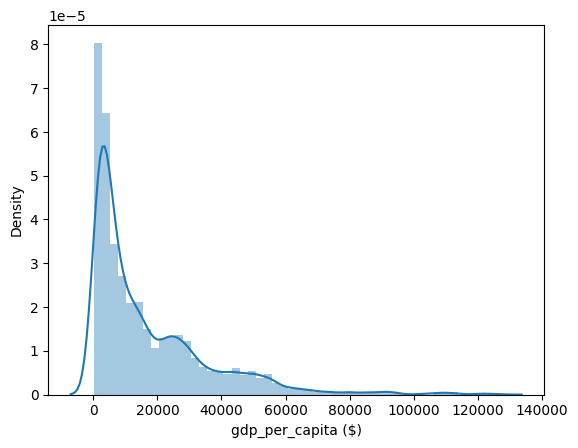

In [36]:
sns.distplot(df['gdp_per_capita ($)'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


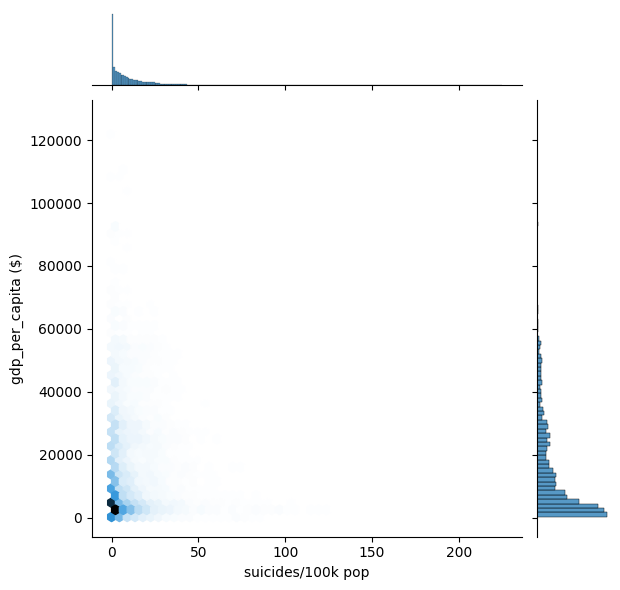

In [37]:
sns.jointplot(x='suicides/100k pop', y='gdp_per_capita ($)', data=df, kind='hex')